# TCDF: Temporal Causal Discovery Framework

This notebook shows the functionality of TCDF. 

See the corresponding paper for more detail: __["Causal Discovery with Attention-Based Convolutional Neural Networks"](https://www.mdpi.com/2504-4990/1/1/19)__.

In [2]:
"""Shows all argument options"""

%run -i "../from_github/TCDF/runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])

TCDF: Temporal Causal Discovery Framework

optional arguments:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_layers HIDDEN_LAYERS
                        Number of

To demonstrate the Temporal Causal Discovery Framework, we apply TCDF to a small dataset (`demo_dataset.csv`). This dataset contains 4 timeseries (called `Timeser0`,`Timeser1`,`Timeser2` and `Timeser3`), all containing 4,000 time steps. `Timeser0` and `Timeser3`contain random values. A value of `Timeser1` at timestep `t` is generated based on timestep `t-1` of `Timeser0` plus some noise. Therefore, `Timeser1` is caused by `Timeser0` with a delay of 1 time step. A value of `Timeser2` at timestep `t` is generated based on timestep `t-2` of `Timeser1` plus some noise. Therefore, `Timeser2` is caused by `Timeser1` with a delay of 2 time steps. File `demo_groundtruth` contains the ground truth, i.e. it tells that there is a causal relationship from `Timeser0` to `Timeser1` with a delay of 1 time step, and a causal relationship from `Timeser1` to `Timeser2` with a delay of 2 time steps.

In [8]:
"""Run TCDF"""
%matplotlib inline
%run -i "../from_github/TCDF/runTCDF.py" --data c_vol__btc_price_timeseries.csv --plot

Arguments: Namespace(cuda=False, data=['c_vol__btc_price_timeseries.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=False, seed=1111, significance=0.8)

 Dataset:  c_vol__btc_price_timeseries.csv

 Analysis started for target:  volume_comments
Epoch:  1 [0%] 	Loss: 57587008.000000
Epoch: 500 [50%] 	Loss: 5361752.000000
Epoch: 1000 [100%] 	Loss: 5355834.500000
Potential causes:  [0]
Validated causes:  [0]

 Analysis started for target:  btc_price
Epoch:  1 [0%] 	Loss: 51173248.000000
Epoch: 500 [50%] 	Loss: 295011.562500
Epoch: 1000 [100%] 	Loss: 221807.234375
Potential causes:  [1]
Validated causes:  [1]

===================Results for c_vol__btc_price_timeseries.csv ==================================
volume_comments causes volume_comments with a delay of 1 time steps.
btc_price causes btc_price with a delay of 1 time steps.


Arguments: Namespace(cuda=False, data=['c_vol__btc_price_timeseries.csv'], dilation_coefficient=4, epochs=1000, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=True, seed=1111, train_test_split=0.8)

 Analysis started for target:  volume_comments
Epoch:  1 [0%] 	Loss: 68346544.000000
Epoch: 500 [50%] 	Loss: 6519767.000000
Epoch: 1000 [100%] 	Loss: 6510273.500000

 Analysis started for target:  btc_price
Epoch:  1 [0%] 	Loss: 48182540.000000
Epoch: 500 [50%] 	Loss: 317413.187500
Epoch: 1000 [100%] 	Loss: 230283.250000

Mean Absolute Scaled Error (MASE) averaged over all time series in c_vol__btc_price_timeseries.csv : 1.3178352402444404 with standard deviation 0.17640292386812284


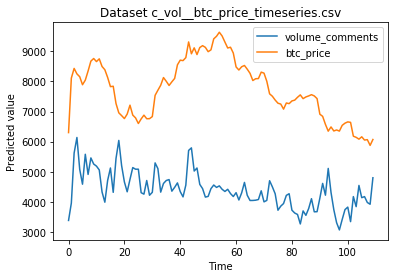

In [14]:
%run -i "../from_github/TCDF/evaluate_predictions_TCDF.py" --data c_vol__btc_price_timeseries.csv --plot

Arguments: Namespace(cuda=False, data=['c_vol__c_aud__s_vol__s_aud__btc_price__norm__timeseries.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  c_vol__c_aud__s_vol__s_aud__btc_price__norm__timeseries.csv

 Analysis started for target:  volume_comments
Epoch:  1 [0%] 	Loss: 0.036599
Epoch: 500 [50%] 	Loss: 0.000581
Epoch: 1000 [100%] 	Loss: 0.000520
Potential causes:  [2, 0]
Validated causes:  [2]

 Analysis started for target:  audience_size_comments
Epoch:  1 [0%] 	Loss: 0.035063
Epoch: 500 [50%] 	Loss: 0.000281
Epoch: 1000 [100%] 	Loss: 0.000276
Potential causes:  [0, 2]
Validated causes:  [0]

 Analysis started for target:  volume_submissions
Epoch:  1 [0%] 	Loss: 0.037775
Epoch: 500 [50%] 	Loss: 0.000542
Epoch: 1000 [100%] 	Loss: 0.000059
Potential causes:  [3, 0]
Validated causes:  [3]

 Analysis started for target:  audience_si

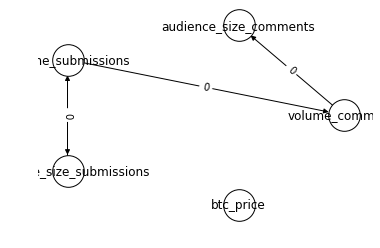

<Figure size 432x288 with 0 Axes>

In [15]:
%run -i "../from_github/TCDF/runTCDF.py" --data c_vol__c_aud__s_vol__s_aud__btc_price__norm__timeseries.csv --plot

Arguments: Namespace(cuda=False, data=['c_vol__c_aud__s_vol__s_aud__btc_price__norm__timeseries.csv'], dilation_coefficient=4, epochs=1000, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=True, seed=1111, train_test_split=0.8)

 Analysis started for target:  volume_comments
Epoch:  1 [0%] 	Loss: 0.035279
Epoch: 500 [50%] 	Loss: 0.000625
Epoch: 1000 [100%] 	Loss: 0.000539

 Analysis started for target:  audience_size_comments
Epoch:  1 [0%] 	Loss: 0.035218
Epoch: 500 [50%] 	Loss: 0.000340
Epoch: 1000 [100%] 	Loss: 0.000331

 Analysis started for target:  volume_submissions
Epoch:  1 [0%] 	Loss: 0.036574
Epoch: 500 [50%] 	Loss: 0.000603
Epoch: 1000 [100%] 	Loss: 0.000054

 Analysis started for target:  audience_size_submissions
Epoch:  1 [0%] 	Loss: 0.035063
Epoch: 500 [50%] 	Loss: 0.000110
Epoch: 1000 [100%] 	Loss: 0.000060

 Analysis started for target:  btc_price
Epoch:  1 [0%] 	Loss: 0.060822
Epoch: 500 [50%] 	Loss: 0.001015
Epoch: 1000 [1

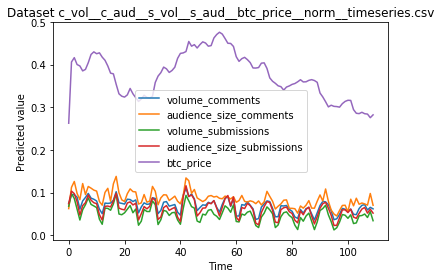

In [12]:
%run -i "../from_github/TCDF/evaluate_predictions_TCDF.py" --data c_vol__c_aud__s_vol__s_aud__btc_price__norm__timeseries.csv --plot

Arguments: Namespace(cuda=False, data=['../from_github/TCDF/data/Finance/random-rels_20_1A_returns30007000_header.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  random-rels_20_1A_returns30007000_header.csv

 Analysis started for target:  S0
Epoch:  1 [0%] 	Loss: 1.068234
Epoch: 500 [50%] 	Loss: 0.183658
Epoch: 1000 [100%] 	Loss: 0.175701
Potential causes:  [11, 7, 10, 2, 6, 1]
Validated causes:  []

 Analysis started for target:  S1
Epoch:  1 [0%] 	Loss: 0.950941
Epoch: 500 [50%] 	Loss: 0.154450
Epoch: 1000 [100%] 	Loss: 0.145199
Potential causes:  [11, 7, 2]
Validated causes:  [11, 7]

 Analysis started for target:  S2
Epoch:  1 [0%] 	Loss: 0.810522
Epoch: 500 [50%] 	Loss: 0.138890
Epoch: 1000 [100%] 	Loss: 0.123137
Potential causes:  [7, 2, 1, 11]
Validated causes:  [7, 2, 1]

 Analysis started for target:  S3
Epoch:  1 [0%] 	Loss

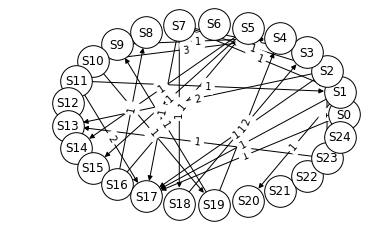

<Figure size 432x288 with 0 Axes>

In [20]:
%run -i "../from_github/TCDF/runTCDF.py" --data ../from_github/TCDF/data/Finance/random-rels_20_1A_returns30007000_header.csv --plot